<a href="https://colab.research.google.com/github/luiesa/pygame/blob/1.9.6-python3.8/Stock_Data_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Aktien/Stock: Python for Finance,Yahoo & Google Finance API, pandas, and matplotlib
#read the Data from Yahoo Finance API. ##'from pandas_datareader import web*##

from pandas_datareader import data #as pdr
import matplotlib.pyplot as plt
import pandas as pd



In [63]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']
#df = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2021-05-13'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
#panel_data = data.DataReader('INPX',data_resouce='yahoo', start_date='2000-01-01', end_date='2021-05-13')
#panel_data.to_frame().head(9) # a dataframe and calling the top nine rows
print(type(panel_data))



<class 'pandas.core.frame.DataFrame'>


In [55]:
panel_data.head(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-03,680400.0,680400.0,680400.0,680400.0,0.0,680400.0
2012-08-06,680400.0,680400.0,680400.0,680400.0,0.0,680400.0
2012-08-07,243000.0,243000.0,243000.0,243000.0,0.0,243000.0
2012-08-08,243000.0,243000.0,243000.0,243000.0,0.0,243000.0
2012-08-09,729000.0,729000.0,729000.0,729000.0,0.0,729000.0
2012-08-10,729000.0,729000.0,729000.0,729000.0,0.0,729000.0
2012-08-13,729000.0,729000.0,729000.0,729000.0,0.0,729000.0
2012-08-14,243000.0,243000.0,243000.0,243000.0,0.0,243000.0
2012-08-15,243000.0,243000.0,243000.0,243000.0,0.0,243000.0


In [64]:
#Preparing the Data
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']
print(close)


Symbols           AAPL        MSFT        ^GSPC
Date                                           
2010-01-04    7.643214   30.950001  1132.989990
2010-01-05    7.656429   30.959999  1136.520020
2010-01-06    7.534643   30.770000  1137.140015
2010-01-07    7.520714   30.450001  1141.689941
2010-01-08    7.570714   30.660000  1144.979980
...                ...         ...          ...
2021-05-07  130.210007  252.460007  4232.600098
2021-05-10  126.849998  247.179993  4188.430176
2021-05-11  125.910004  246.229996  4152.100098
2021-05-12  122.769997  239.000000  4063.040039
2021-05-13  124.970001  243.029999  4112.500000

[2860 rows x 3 columns]


In [65]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_weekdays)

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13'],
              dtype='datetime64[ns]', length=2965, freq='B')


In [66]:
# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)
print(close)

Symbols           AAPL        MSFT        ^GSPC
2010-01-01         NaN         NaN          NaN
2010-01-04    7.643214   30.950001  1132.989990
2010-01-05    7.656429   30.959999  1136.520020
2010-01-06    7.534643   30.770000  1137.140015
2010-01-07    7.520714   30.450001  1141.689941
...                ...         ...          ...
2021-05-07  130.210007  252.460007  4232.600098
2021-05-10  126.849998  247.179993  4188.430176
2021-05-11  125.910004  246.229996  4152.100098
2021-05-12  122.769997  239.000000  4063.040039
2021-05-13  124.970001  243.029999  4112.500000

[2965 rows x 3 columns]


In [67]:
# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')
print(close)

Symbols           AAPL        MSFT        ^GSPC
2010-01-01         NaN         NaN          NaN
2010-01-04    7.643214   30.950001  1132.989990
2010-01-05    7.656429   30.959999  1136.520020
2010-01-06    7.534643   30.770000  1137.140015
2010-01-07    7.520714   30.450001  1141.689941
...                ...         ...          ...
2021-05-07  130.210007  252.460007  4232.600098
2021-05-10  126.849998  247.179993  4188.430176
2021-05-11  125.910004  246.229996  4152.100098
2021-05-12  122.769997  239.000000  4063.040039
2021-05-13  124.970001  243.029999  4112.500000

[2965 rows x 3 columns]


In [70]:
# Aligning the original DataFrame with the new DatetimeIndex 
close.head(10)

Symbols,AAPL,MSFT,^GSPC
2010-01-01,NaN,NaN,NaN
2010-01-04,7.643214,30.950001,1132.989990
2010-01-05,7.656429,30.959999,1136.520020
2010-01-06,7.534643,30.770000,1137.140015
2010-01-07,7.520714,30.450001,1141.689941
2010-01-08,7.570714,30.660000,1144.979980
2010-01-11,7.503929,30.270000,1146.979980
2010-01-12,7.418571,30.070000,1136.219971
2010-01-13,7.523214,30.350000,1145.680054
2010-01-14,7.479643,30.959999,1148.459961


In [83]:
# Looking at the Data of a Pandas DataFrame
close.describe()

Symbols,AAPL,MSFT,^GSPC
count,2964.000000,2964.000000,2964.000000
mean,36.817558,74.225567,2137.487068
std,29.436980,58.774843,742.172145
min,6.858929,23.010000,1022.580017
25%,17.908035,30.530001,1427.777466
50%,27.408751,47.875000,2066.339966
75%,44.114375,101.442499,2713.219971
max,143.160004,261.970001,4232.600098


In [89]:
# moving average of the original time-serie
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']
print(msft)

2010-01-01           NaN
2010-01-04     30.950001
2010-01-05     30.959999
2010-01-06     30.770000
2010-01-07     30.450001
                 ...    
2021-05-07    252.460007
2021-05-10    247.179993
2021-05-11    246.229996
2021-05-12    239.000000
2021-05-13    243.029999
Freq: B, Name: MSFT, Length: 2965, dtype: float64


In [94]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()


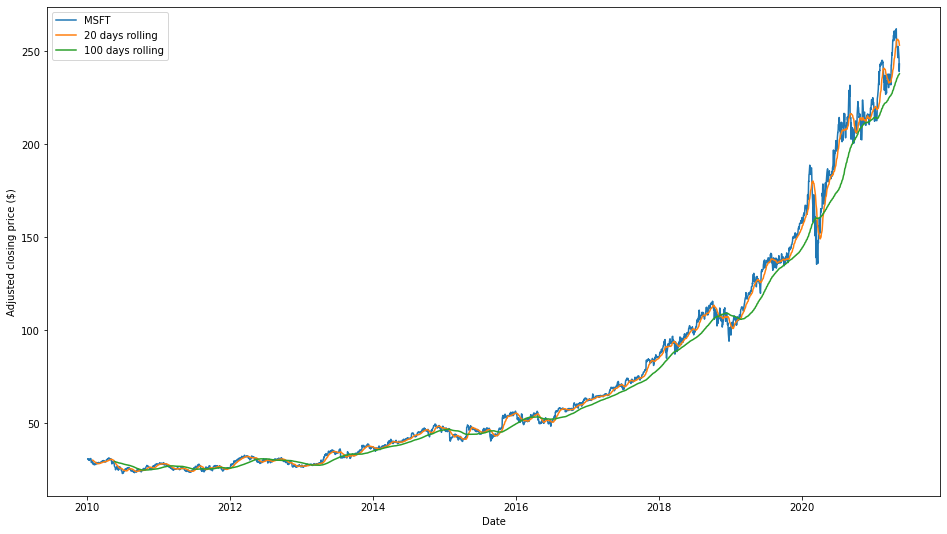

In [96]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

